In [1]:
from importlib import reload
from model_trainer import ModelTrainer
from train import download_and_unpack_dataset, train

import json

In [2]:
root_dir = "/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn"

config_file = open(root_dir + "/trainer_config.json", 'r')
config = json.load(config_file)
config_file.close()

print(config)

{'model_name': 'Plain18Layer', 'store_model_dir_rel_path': '/savedmodels', 'train_dataset_dir_rel_path': '/data/cifar10/train', 'test_dataset_dir_rel_path': '/data/cifar10/test', 'dataset_root_dir_rel_path': '/data', 'random_seed': 420, 'batch_size': 256, 'epochs': 20, 'learning_rate': 0.01}


In [3]:
download_and_unpack_dataset(root_dir + config['dataset_root_dir_rel_path'])

Data already downloaded


In [ ]:
train(root_dir, config)

Load train data from /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/train
Load test data from /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/test
Detected device:  cpu
Epoce: 0


## Load model and test

In [15]:
from model_plain_18_layer import Plain18Layer
from model_wrapper import ModelWrapper
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import json
import matplotlib.pyplot as plt

In [6]:

test_dataset = ImageFolder(
    root="/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/test",
    transform=ToTensor()
)
# Create DataLoader
test_data_loader = DataLoader(
    dataset=test_dataset,
    batch_size=256,
    shuffle=True,
    num_workers=4,
    pin_memory=False  # should be True if cuda is available
)

In [7]:

model = Plain18Layer()
model_wrapper = ModelWrapper(model)

model_wrapper.load_model_weights("/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/savedmodels/Plain18Layer_20231203_2213/model_state_dict")

model_wrapper.evaluate_model(test_data_loader)


{'mean_loss': 1.7065006494522095, 'mean_acc': 0.753613293170929}

In [10]:
training_run_file = open("/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/savedmodels/Plain18Layer_20231203_2213/training_run.json", "r")
training_run = json.load(training_run_file)
training_run_file.close()

In [19]:
val_losses = [x['val_loss'] for x in training_run['training_history']]
train_losses = [x['train_loss'] for x in training_run['training_history']]
plt.plot(val_losses, label="val loss")
plt.plot(train_losses, label='train loss')
plt.legend()
plt.show()

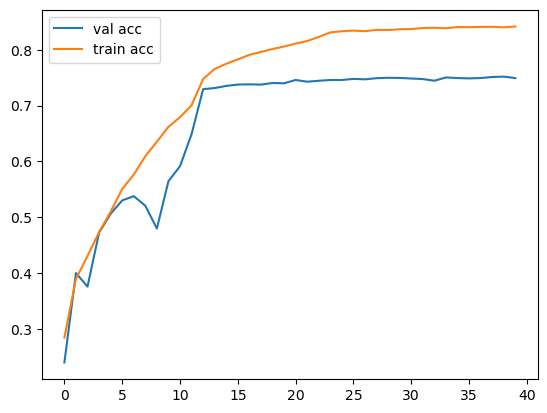

In [26]:
val_accs = [x['val_acc'] for x in training_run['training_history']]
train_accs = [x['train_acc'] for x in training_run['training_history']]
plt.plot(val_accs, label="val acc")
plt.plot(train_accs, label='train acc')
plt.legend()
plt.show()